<a href="https://colab.research.google.com/github/kumarUjjawal/deep-learning-with-fastai/blob/master/vision/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segmentation Using Fastai Library
For this task we'll use CamVid dataset, a datasets of screenshots from cameras in the car.

In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/images')]

In [4]:
import numpy as np
codes = np.loadtxt(path/'codes.txt', dtype=str)

In [5]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/0001TP_007500.png')

In [6]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/0016E5_08057_P.png')

In [7]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [8]:
dls = SegmentationDataLoaders.from_label_func(path, bs=8, fnames= fnames,
                                              label_func= label_func, codes= codes)

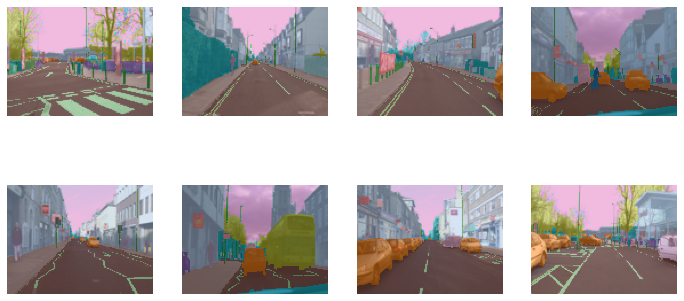

In [9]:
dls.show_batch()

In [10]:
learn = unet_learner(dls, resnet34)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,2.977691,2.230181,01:15


epoch,train_loss,valid_loss,time
0,1.800130,1.476260,01:19
1,1.572484,1.237545,01:18
2,1.413569,1.174977,01:18
3,1.271060,0.889620,01:18
4,1.139535,0.818239,01:18
5,1.039742,0.799211,01:18


In [14]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses()

NameError: ignored

With DataBlock API

In [15]:
segment = DataBlock(blocks=(ImageBlock, MaskBlock),
                    get_items= get_image_files,
                    get_y= label_func,
                    splitter= RandomSplitter(),
                    item_tfms= Resize(460),
                    batch_tfms=aug_transforms(size=224))

In [16]:
dls = segment.dataloaders(path/"images", path=path, bs=8)

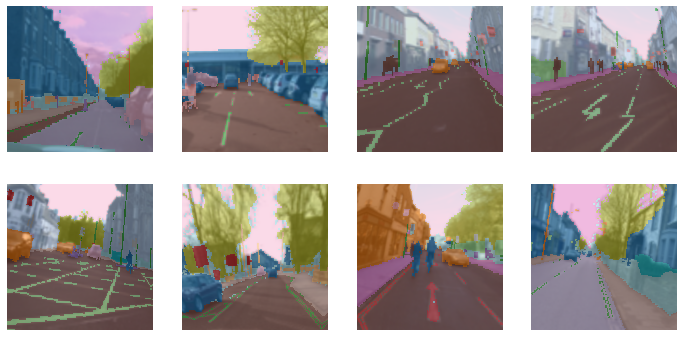

In [17]:
dls.show_batch()